In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./src')

from plot import *
from matrix import *
from ordinate import *
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '/home/prichter/Documents/data/methanotrophy'

In [3]:
M = CountMatrix(level='family') # For now, just run tests on the ASV matrix. 
M.read_csv(f'{DATA_DIR}/data.csv')
M.load_metadata(f'{DATA_DIR}/metadata.csv')

n_components = 2
model_bray_curtis = NonmetricMultidimensionalScaling(n_components=n_components, metric='bray-curtis')
# model_chi_squared = NonmetricMultidimensionalScaling(n_components=self.n_components, metric='chi-squared')

model_bray_curtis.fit(M)

In [4]:
model_bray_curtis.fit_surface(M.get_metadata('flux_ch4'))

In [8]:
model_bray_curtis.surface_models

{'flux_ch4': GAM(callbacks=[Deviance(), Diffs()], distribution=NormalDist(), 
    fit_intercept=True, link=IdentityLink(), max_iter=100, 
    terms=s(0) + s(1) + intercept, tol=0.0001, verbose=False)}

(100, 100)
(100, 100)


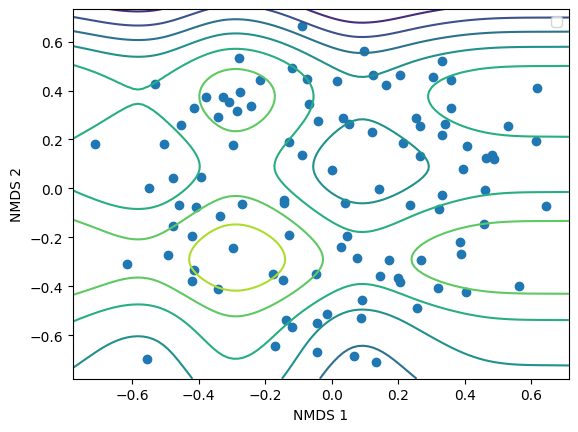

In [16]:
plot_nonmetric_multidimensional_scaling(model_bray_curtis, show_fit_surface=['flux_ch4'])